<a href="https://colab.research.google.com/github/heernink/DPatch/blob/master/Data_Visualization_Homework_1_ver1_%EA%B9%80%ED%9D%AC%EB%AF%BC(2022120092).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
####################################################
## Coding Homework - 1
## Jongwon Choi
## GSAIM, Chung-Ang University
## choijw@cau.ac.kr
####################################################
import numpy as np
import matplotlib.pyplot as plt

### **[ 1-A ]**

Interval_values(using min(x), max(x))
[8.929305099370136, 19.865798041712488, 30.80229098405484, 41.7387839263972]


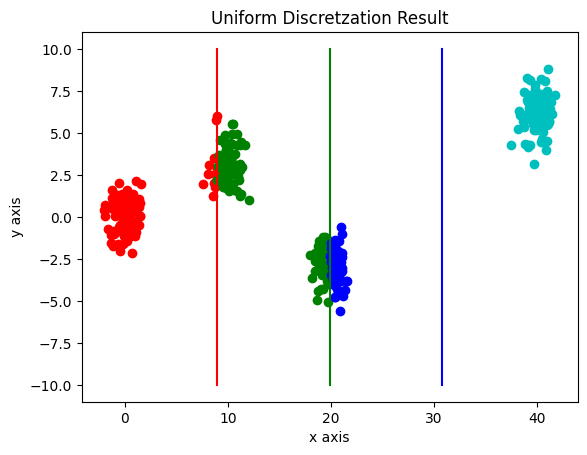

In [2]:
### Problem 1. Discretization
NUM_CLUSTER = 4
x, y = np.load('problem1.npy')
interval_values = list(range(NUM_CLUSTER-1))

### Problem 1-A. Implement the uniform discretization

####### BLANK #######
interval_values = [] # 1. interval_values 재정의함
for i in range(NUM_CLUSTER-1): 
  interval_values.append(min(x) + ((max(x) - min(x))/4) * (i+1)) # 2-1. x 데이터의 (max - min)을 4분할하여 interval_values에 append함

interval_values.append(max(x)) # 2-2. interval_values의 마지막 값으로 max(x) append함
print('Interval_values(using min(x), max(x))')
#####################

print(interval_values)
labels = np.sum(np.reshape(x, [-1,1]) > np.reshape(interval_values, [1,-1]), axis=1)

### Plot...
plt.clf()
colors = ['r', 'g', 'b', 'c']
for i in range(4):
  plt.scatter(x[labels==i],y[labels==i], color=colors[i])
for i in range(3):  
  plt.plot([interval_values[i], interval_values[i]], [-10, 10], color=colors[i])
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Uniform Discretzation Result")
plt.show()

### **[ 1-B ]**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Interval_values(using K-Means clustering)
[1.5984137350564864, 11.998209878962454, 21.558553692776563, 41.7387839263972]


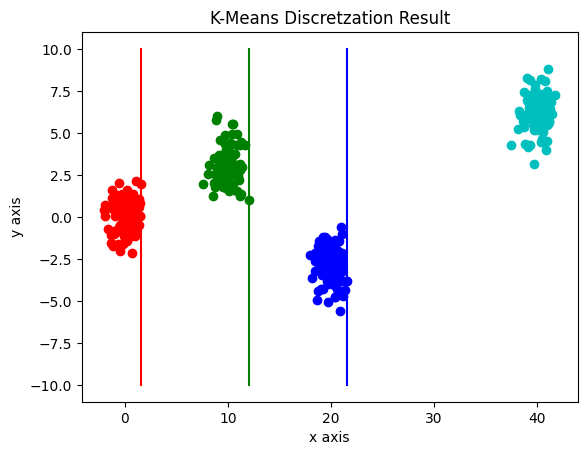

In [3]:
### Problem 1-B. Implement the K-Means clustering-based discretization
from sklearn.cluster import KMeans

####### BLANK #######
x_cluster = KMeans(n_clusters = 4) # 1. KMeans clustering을 이용하여 4개의 군집 생성함
x_cluster.fit(x.reshape(-1, 1))
pred = x_cluster.predict(x.reshape(-1, 1)) # 2. pred = 군집 결과값 (0, 1, 2, 3)
# 3. 군집별 max(x)을 구하여 오름차순 정렬 수행함. 이를 통해 interval_values를 재정의함
interval_values = sorted(list((max(x[np.where(pred == 0)]), max(x[np.where(pred == 1)]), max(x[np.where(pred == 2)]), max(x[np.where(pred == 3)]))))
print('Interval_values(using K-Means clustering)')
#####################

print(interval_values)
labels = np.sum(np.reshape(x, [-1,1]) > np.reshape(interval_values, [1,-1]), axis=1)

### Plot...
plt.clf()
colors = ['r', 'g', 'b', 'c']
for i in range(4):
  plt.scatter(x[labels==i],y[labels==i], color=colors[i])
for i in range(3):  
  plt.plot([interval_values[i], interval_values[i]], [-10, 10], color=colors[i])
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("K-Means Discretzation Result")
plt.show()

-------------------

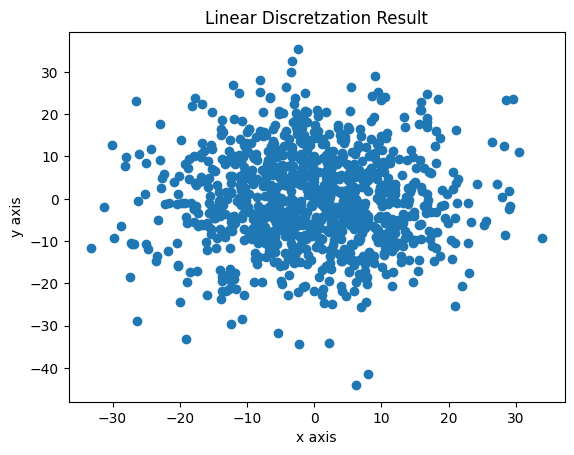

In [4]:
### Problem 2. Various Distribution
x, y = np.load('problem2.npy')

### Plot...
plt.clf()
plt.scatter(x,y)
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Linear Discretzation Result")
plt.show()

### **[ 2-A ]**

x의 평균: -0.451971192808032
x의 표준편차: 11.03605905299881


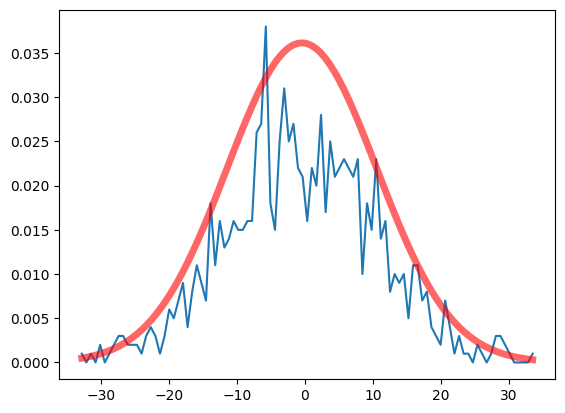

In [5]:
### Problem 2-A. Find the best distribution and its parameters for x position
from scipy.stats import norm as target_stat #Gaussian distribution

x_edges = np.linspace(min(x), max(x), 100)
x_bins = (x_edges[1:] + x_edges[:-1])/2
freq,_ = np.histogram(x, bins=x_edges)
normalized_freq = freq / np.sum(freq)

####### BLANK #######
pdf = target_stat.pdf(x_bins, loc=x.mean(), scale=x.std()) # 파라미터 : 정규분포의 점추정값(평균, 표준편차)
print('x의 평균:', x.mean())
print('x의 표준편차:', x.std())
#####################

plt.clf()
plt.plot(x_bins, normalized_freq)
plt.plot(x_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.show()



> **X에 대한 분포 추정**



     x : Gaussian distribution
      - 이유
        1. x의 그래프를 plot해보면 x는 -30부터 30까지 넓게 분포해있음
        2. 정규분포의 형태를 보임에 따라 x는 정규분포를 따를 것

      - 이에 대한 근거를 제시하기 위하여 정규성 분포임을 확인할 수 있는 'Kolmogorov Smirnov 검정'을 수행함
      
      - 'Kolmogorov Smirnov 검정'
        - 주어진 어떤 표본분포가 이론적으로 기대되는 분포 (이항분포, 정규분포, 포와송분포) 와 일치하는지의 여부를 검정할 때 이용
        - 영가설 H0 : 주어진 자료의 분포는 검정하고자하는 분포를 따른다.
        - 검정통계량 z = 누적관측분포와 누적이론적 분포와의 가장 큰 차이
        - Z 값이 작을수록(=p-value 클수록) H0 채택 (=해당 분포를 따른다.)

    

     'Kolmogorov Smirnov 검정'
     - 각 분포의 p-value 값은 다음 표와 같음
     - 이에 정규분포의 p-value값은 0.9578(>유의수준 0.05)이므로 Ho를 채택함
      -> x는 정규분포를 따른다고 할 수 있음

|Distribution|P-value|
|---|---|
|Uniform|0.0000|
|Norm|0.9578|
|Gamma|0.9501|
|Expon|0.0000|
|Lognorm|0.8987|

In [7]:
# 정규성 검정 (Kolmogorov Smirnov 검정)
dist_names = ["uniform","norm", "gamma", "expon", "lognorm"]
dist_results = []
params = {}

for dist_name in dist_names:
  dist = getattr(scipy.stats, dist_name)
  param = dist.fit(x) # 관측값(max distances) 을 이용하여 가정한 분포의 모수를 추정 
  params[dist_name] = param # 추정한 모수를 Dictionary에 넣어
  Stat, p = scipy.stats.kstest(x, dist_name, param) # Kolmogorov-Smirnov 검정 수행
  dist_results.append((dist_name, p))

print('Kolmogorov Smirnov 검정 결과: (분포, p-value)')
print('--> ', dist_results)

best_dist, best_p = (max(dist_results, key = lambda item: item[1])) # p-value가 가장 큰 것 선택
print('Kolmogorov Smirnov 검정 결과: (해당 분포, 가장 큰 p-value 값)')
print('--> ', best_dist, best_p)

Kolmogorov Smirnov 검정 결과: (분포, p-value)
-->  [('uniform', 2.6344875845834785e-37), ('norm', 0.9577631504819117), ('gamma', 0.9501371017694162), ('expon', 4.316821153182772e-104), ('lognorm', 0.8986919073092797)]
Kolmogorov Smirnov 검정 결과: (해당 분포, 가장 큰 p-value 값)
-->  norm 0.9577631504819117




> **x 분포(정규분포)의 파라미터 최적화**



    x 분포(정규분포)의 파라미터 최적화
      - Brute Force 알고리즘을 이용하여 최적의 파라미터 탐색
      - MLE(최대가능도 추정법) 이용하여 파라미터 값 점추정
        1. 파라미터(mu, sigma) 값의 여러 조합 생성
        2. 정규분포의 가능도함수를 계산
        3. 가능도함수를 최대화하는 파라미터(mu, sigma) 값을 찾음

In [12]:
# Brute Force 알고리즘을 이용하여 최적의 파라미터 탐색
def brute_force_norm_params(data):
    best_mu, best_sigma = None, None
    best_ll = float('-inf')
    # 1. 파라미터(mu, sigma) 값의 여러 조합 생성
    mu_range = np.linspace(-100, 100, num=100)  # mu 범위 설정
    sigma_range = np.linspace(0.1, 20, num=100)  # sigma 범위 설정

    for mu in mu_range:
        for sigma in sigma_range:
            # 2. 정규분포의 가능도함수를 계산
            ll = np.sum(target_stat.logpdf(data, loc=mu, scale=sigma))
            # 3. 현재 파라미터에서의 가능도 함수 값이 이전까지의 최대값보다 높다면 최적의 파라미터 값(best_mu, best_sigma) 업데이트
            if ll > best_ll:
                best_ll = ll
                best_mu = mu
                best_sigma = sigma

    return best_mu, best_sigma

best_mu, best_sigma = brute_force_norm_params(x)

print(f"Best mu: {best_mu:.2f}, Best sigma: {best_sigma:.2f}")

Best mu: -1.01, Best sigma: 10.95


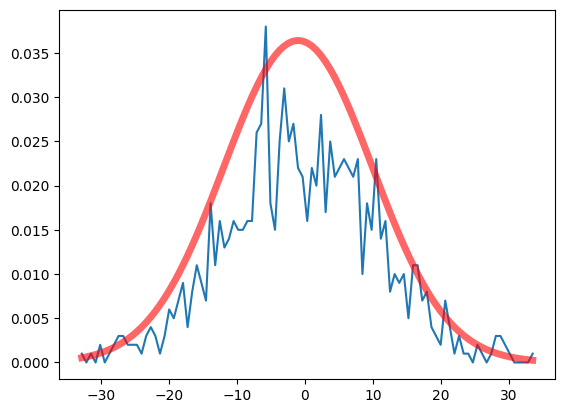

In [13]:
# Brute Force 알고리즘을 이용하여 찾은 최적의 파라미터를 이용하여 그래프 그리기 (위 그래프와 비교)
from scipy.stats import norm as target_stat #Gaussian distribution
x_edges = np.linspace(min(x), max(x), 100)
x_bins = (x_edges[1:] + x_edges[:-1])/2
freq,_ = np.histogram(x, bins=x_edges)
normalized_freq = freq / np.sum(freq)

####### BLANK #######
pdf = target_stat.pdf(x_bins, loc=best_mu, scale=best_sigma) # 위에서 구한 최적의 파라미터 값으로 변경
#####################

plt.clf()
plt.plot(x_bins, normalized_freq)
plt.plot(x_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.show()

-------------


### **[ 2-B ]**

In [14]:
### Problem 2-B. Find the best distribution and its parameters
# for the longest distance of every 10 consecutive samples
from scipy.stats import lognorm as target_stat #Log-Normal distribution
x, y = np.load('problem2.npy')


> **가장 멀리 떨어진 구슬과 원점 사이의 거리(=max_distance)에 대한 분포 추정**

     max_distance = 가장 멀리 떨어진 구슬과 원점 사이의 거리 : Log-norm distribution
      - 이유
        1-1. 100번의 랜덤 샘플링을 통하여 구슬의 좌표를 구하여, 각각 원점 사이의 거리를 계산함. 
        1-2. 랜덤 샘플링 마다 가장 거리가 큰 값을 추출하여 길이가 100인 가장 멀리 떨어진 구슬과 원점 사이의 거리를 구함
        1-3. 위 거리의 그래프를 plot해보면 로그정규분포의 형태를 보임에 따라 z는 로그정규분포를 따를 것으로 가정함
        2. 구슬의 움직임이 중심을 기준으로 대칭적인 모양이 아닌, 한쪽 방향으로 치우쳐져 있을 가능성이 있음 -> 로그정규분포는 이러한 비대칭적인 분포를 나타내는 데 적합함
        3. 가장 멀리 떨어진 구슬과 원점 사이의 거리는 0보다 크며 로그정규분포는 양수 데이터 분포를 모델링하는 데 적합함

      - 'Kolmogorov Smirnov 검정'을 수행하여 z의 분포 검정
      
      - 'Kolmogorov Smirnov 검정'
        - 주어진 어떤 표본분포가 이론적으로 기대되는 분포 (이항분포, 정규분포, 포와송분포) 와 일치하는지의 여부를 검정할 때 이용
        - 영가설 H0 : 주어진 자료의 분포는 검정하고자하는 분포를 따른다.
        - 검정통계량 z = 누적관측분포와 누적이론적 분포와의 가장 큰 차이
        - Z 값이 작을수록(=p-value 클수록) H0 채택 (=해당 분포를 따른다.)

    

In [15]:
max_distances = []

def distance_from_origin(x, y):
    """원점과 (x,y) 좌표 간의 거리를 계산하는 함수"""
    return np.sqrt(x**2 + y**2)

# 1-1. 100번의 랜덤 샘플링을 통하여 구슬의 좌표를 구하여, 각각 원점 사이의 거리를 계산
n_simulations = 100 # 시뮬레이션 횟수

for i in range(n_simulations):
  idx = np.random.choice(len(x), size=10, replace=False)
  x_sampled = x[idx] # x 좌표 생성
  y_sampled = y[idx] # y 좌표 생성
  
  distances = distance_from_origin(x_sampled, y_sampled) # 1-1. 각 구슬과 원점 사이의 거리 계산
  max_distances.append(np.max(distances)) # 1-2. 각 시뮬레이션에서 가장 멀리 떨어진 구슬과 원점 사이의 거리 계산

len(max_distances)

100

(array([ 2.,  5., 16., 16., 18., 24.,  7.,  6.,  3.,  3.]),
 array([13.74512748, 16.58956266, 19.43399783, 22.27843301, 25.12286819,
        27.96730337, 30.81173855, 33.65617373, 36.5006089 , 39.34504408,
        42.18947926]),
 <BarContainer object of 10 artists>)

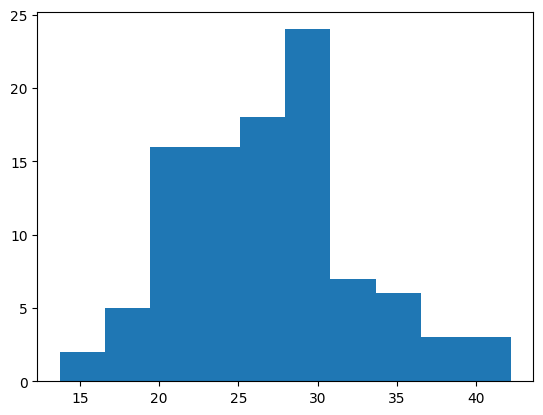

In [16]:
# 1-3. 그래프를 plot해보면 로그정규분포의 형태를 보임에 따라 z는 로그정규분포를 따를 것으로 가정함
plt.hist(max_distances)

     'Kolmogorov Smirnov 검정'
     - 각 분포의 p-value 값은 다음 표와 같음
     - 이에 로그정규분포의 p-value값은 0.6528(>유의수준 0.05)이므로 Ho를 채택함
      -> 가장 멀리 떨어진 구슬과 원점 사이의 거리(=max_distance)는 로그 정규분포를 따른다고 할 수 있음

|Distribution|P-value|
|---|---|
|Uniform|0.0000|
|Norm|0.4420|
|Gamma|0.6386|
|Expon|0.0000|
|Lognorm|0.6528|

In [17]:
# 정규성 검정 (Kolmogorov Smirnov 검정)
dist_names = ["uniform","norm", "gamma", "expon", "lognorm"]
dist_results = []
params = {}

for dist_name in dist_names:
  dist = getattr(scipy.stats, dist_name)
  param = dist.fit(max_distances) # 관측값(max distances) 을 이용하여 가정한 분포의 모수를 추정 
  params[dist_name] = param # 추정한 모수를 Dictionary에 넣어
  Stat, p = scipy.stats.kstest(max_distances, dist_name, param) # Kolmogorov-Smirnov 검정 수행
  dist_results.append((dist_name, p))

print('Kolmogorov Smirnov 검정 결과: (분포, p-value)')
print('--> ', dist_results)

best_dist, best_p = (max(dist_results, key = lambda item: item[1])) # p-value가 가장 큰 것 선택
print('Kolmogorov Smirnov 검정 결과: (해당 분포, 가장 큰 p-value 값)')
print('--> ', best_dist, best_p)

Kolmogorov Smirnov 검정 결과: (분포, p-value)
-->  [('uniform', 7.082739689860498e-05), ('norm', 0.4420255151455408), ('gamma', 0.6386439451660999), ('expon', 4.911774111770047e-09), ('lognorm', 0.6528096061652213)]
Kolmogorov Smirnov 검정 결과: (해당 분포, 가장 큰 p-value 값)
-->  lognorm 0.6528096061652213



> **가장 멀리 떨어진 구슬과 원점 사이의 거리(=max_distance)에 대한 분포의 파라미터 최적화**

    max_distance(=가장 멀리 떨어진 구슬과 원점 사이의 거리) 분포(로그정규분포)의 파라미터 최적화
      - Brute Force 알고리즘을 이용하여 최적의 파라미터 탐색
      - MLE(최대가능도 추정법) 이용하여 파라미터 값 점추정
        1. 파라미터(mu, sigma) 값의 여러 조합 생성
        2. 로그정규분포의 가능도함수를 계산
        3. 가능도함수를 최대화하는 파라미터(mu, sigma) 값을 찾음

In [18]:
# Brute Force 알고리즘을 이용하여 최적의 파라미터 탐색

def likelihood(params, data):
    # 1. 가능도 함수 계산
    s, scale = params
    return np.sum(target_stat.logpdf(data, s=s, scale=scale))

def brute_force_lognorm_params(data):
    # 2. 파라미터(mu, sigma) 값의 여러 조합 생성
    s_range = np.linspace(0.1, 1, 100) # sigma 범위 설정
    scale_range = np.linspace(0.1, 10, 100) # scale = exp(mu) 범위 설정

    # 3-1. 가능도 함수를 최대화하는 파라미터 찾기
    best_likelihood = -np.inf
    best_params = None
    
    for s in s_range:
        for scale in scale_range:
            params = [s, scale]
            if np.any(np.array(params) <= 0): 
                continue
            current_likelihood = likelihood(params, distances)
            # 3-2. 현재 파라미터에서의 가능도 함수 값이 이전까지의 최대값보다 높다면 최적의 파라미터 값(best_params) 업데이트
            if current_likelihood > best_likelihood:
                best_likelihood = current_likelihood
                best_params = params

    return best_likelihood, best_params

best_likelihood, best_params = brute_force_lognorm_params(max_distances)
print(f"Best sigma: {best_params[0]:.2f}, Best scale: {best_params[1]:.2f}")

Best sigma: 0.59, Best scale: 10.00


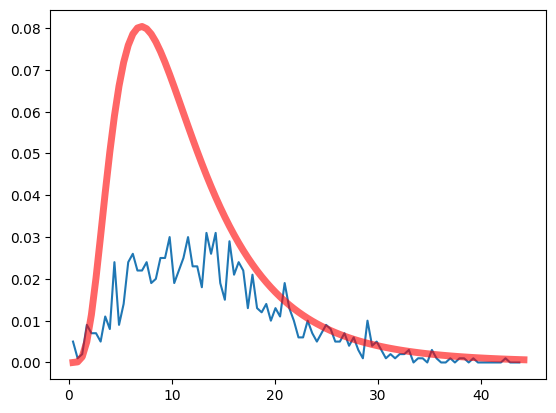

In [20]:
# Brute Force 알고리즘을 이용하여 찾은 최적의 파라미터를 이용하여 그래프 그리기
from scipy.stats import lognorm as target_stat #Log-Normal distribution

####### BLANK #######
d = np.sqrt(x**2 + y**2)
d_edges = np.linspace(min(d), max(d), 100)
d_bins = (d_edges[1:] + d_edges[:-1])/2
freq,_ = np.histogram(d, bins=d_edges)
normalized_freq = freq / np.sum(freq)
normalized_freq = normalized_freq[:-1]

pdf = target_stat.pdf(d_bins, s=best_params[0], scale = best_params[1]) # 위에서 구한 최적의 파라미터 값으로 변경
#####################

plt.clf()
plt.plot(d_bins[:-1], normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.show()